<a href="https://colab.research.google.com/github/V1S10US/My-projects/blob/main/Data_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
sns.set(rc={'figure.figsize' : (9, 6)})

In [55]:
submissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning Introduction/submissions_data_train.csv')
submissions.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [56]:
event_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning Introduction/event_data_train.csv')
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


# EDA

In [57]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [58]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [59]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [60]:
event_data.date[1]

Timestamp('2015-06-15 04:00:48')

In [61]:
event_data['day'] = event_data.date.dt.date
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [62]:
event_data.day.nunique()

1070

Количество действий всех пользователей по дням

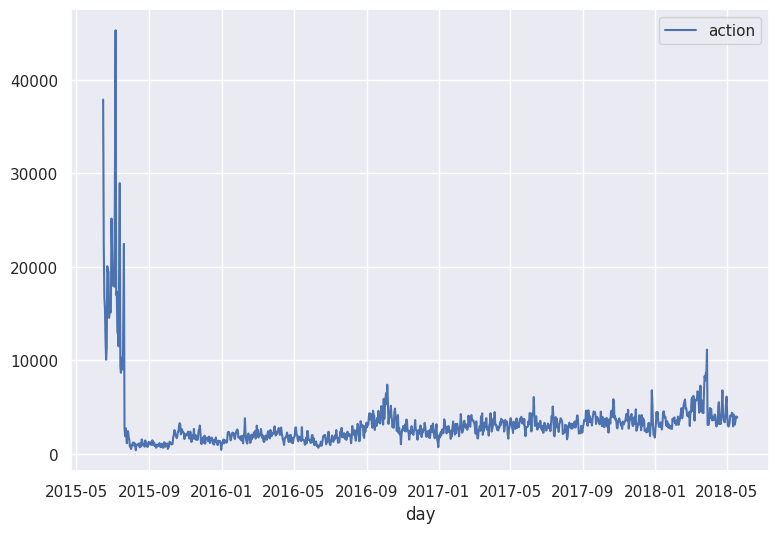

In [63]:
actions_by_days = event_data.groupby(event_data.day, as_index=True).agg({'action' : 'count'})
actions_by_days.head()
sns.lineplot(actions_by_days, );

Количество уникальных пользователей по дням

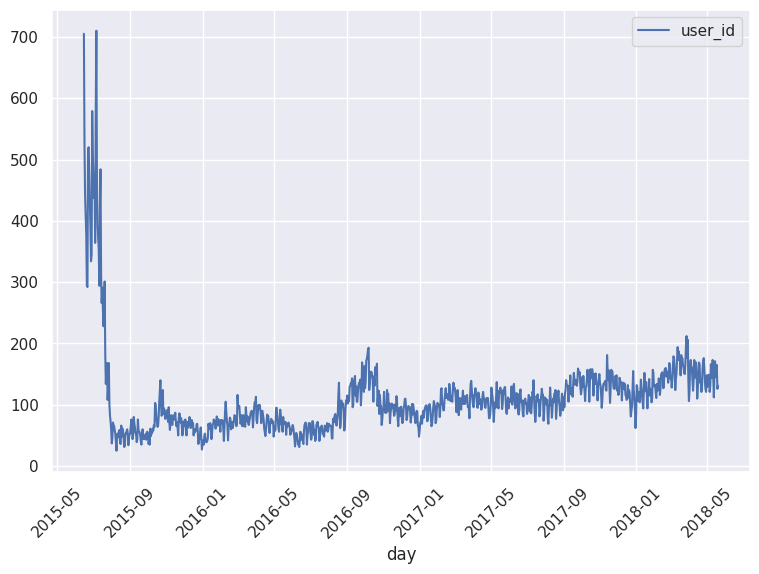

In [64]:
uniques_by_day = event_data.groupby(event_data.day).agg({'user_id' : 'nunique'})
sns.lineplot(uniques_by_day).tick_params(axis='x', rotation=45);

Распределение сабмитов по часам в день

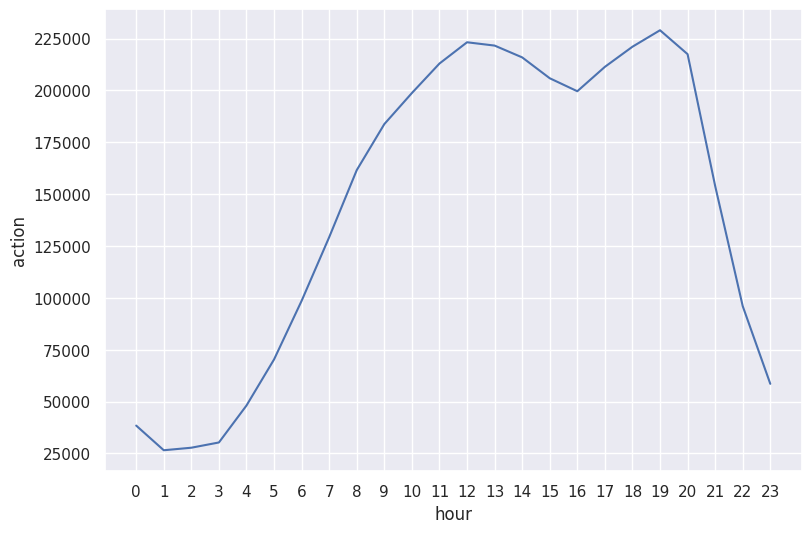

In [65]:
per_hour_attempts = event_data.action\
                    .groupby(event_data.date.dt.hour).count()\
                    .rename_axis('hour')
sns.lineplot(per_hour_attempts).set_xticks(range(24));

Суммарное количество пройденных шагов

In [66]:
users_actions_pt = event_data.pivot_table(index='user_id', columns='action',
                       values='step_id', aggfunc='count',
                       fill_value=0).reset_index()
users_actions_pt.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


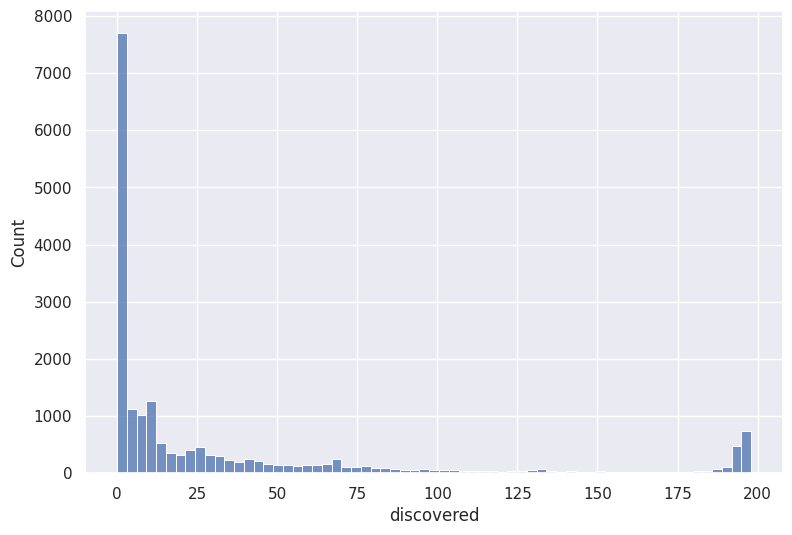

In [67]:
sns.histplot(users_actions_pt.discovered);

In [68]:
submissions['date'] = pd.to_datetime(submissions.timestamp, unit='s')
submissions['day'] = submissions.date.dt.date
submissions

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [69]:
users_subs_pt = submissions.pivot_table(index='user_id', columns='submission_status',
                       values='step_id', aggfunc='count',
                       fill_value=0).rename_axis('', axis=1)
users_subs_pt

,correct,wrong
user_id,,
2,2,0
3,29,23
5,2,2
8,9,21
14,0,1
...,...,...
26787,3,0
26790,1,0
26794,33,9


<Axes: ylabel='Count'>

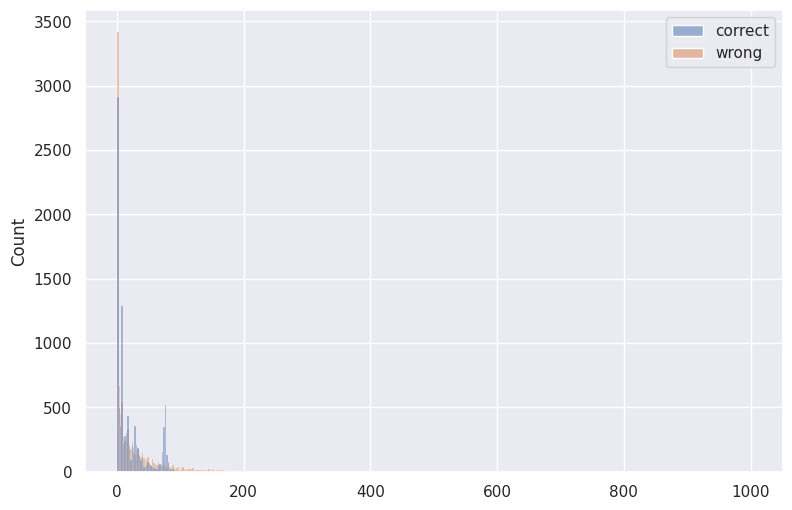

In [70]:
sns.histplot(users_subs_pt)

Пользователи с экстремальным количеством сабмитов:

In [71]:
max_correct_id = users_subs_pt[users_subs_pt.correct == users_subs_pt.correct.max()]
min_correct_id = users_subs_pt[users_subs_pt.correct == users_subs_pt.correct.min()]
max_wrong_id = users_subs_pt[users_subs_pt.wrong == users_subs_pt.wrong.max()]
min_wrong_id = users_subs_pt[users_subs_pt.wrong == users_subs_pt.wrong.min()]
max_wrong_id

,correct,wrong
user_id,,
12265,50,1001


In [72]:
users_actions_pt.sort_values('passed', ascending=False)

action,user_id,discovered,passed,started_attempt,viewed
4089,5653,198,198,93,261
18822,26225,198,198,109,487
854,1139,198,198,77,244
1256,1715,198,198,111,389
10688,14841,198,198,109,520
...,...,...,...,...,...
5535,7662,1,0,1,1
11445,15899,1,0,1,1
16817,23420,1,0,1,1
1747,2385,1,0,1,1


In [73]:
users_subs_pt.sort_values('correct', ascending=False)

,correct,wrong
user_id,,
1046,421,513
5552,186,93
17135,168,177
6183,142,65
8461,135,42
...,...,...
1321,0,2
26349,0,1
9422,0,1


Промежутки времени между сабмитами каждого пользователя

In [74]:
gap_data = event_data[['user_id', 'day', 'timestamp']] \
  .drop_duplicates(subset=['user_id', 'day']) \
  .groupby('user_id')['timestamp'].apply(list) \
  .apply(np.diff).values
gap_data = pd.Series(np.concatenate(gap_data, axis=0)) / (24 * 60*60) # by day
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<Axes: >

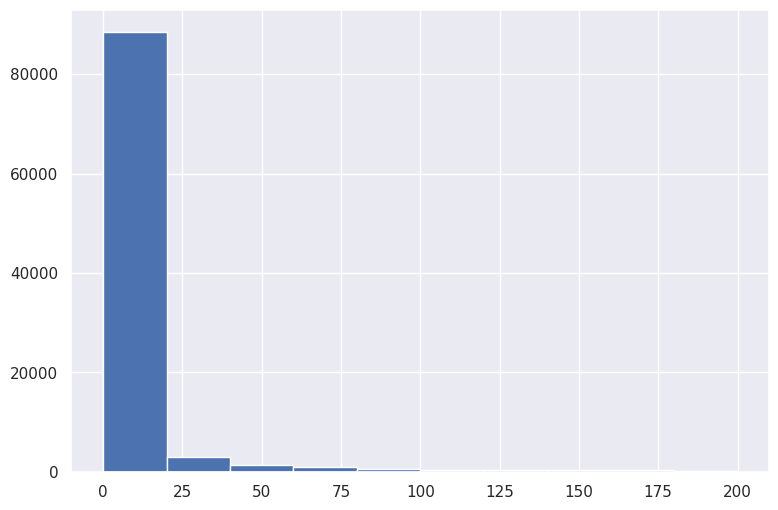

In [75]:
gap_data[gap_data < 200].hist()

In [76]:
gap_data.quantile(0.95)

59.760440972222156

In [77]:
event_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [78]:
now = 1526772811
dropout_threshold = 30 * 24 * 60 * 60

In [79]:
users_data = event_data.groupby('user_id', as_index=False) \
          .agg({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [80]:
users_data['is_gone'] = (now - users_data.last_timestamp) > dropout_threshold
users_data

,user_id,last_timestamp,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [81]:
# !
users_data = users_data.merge(users_subs_pt, on='user_id', how='outer')

In [82]:
users_data.fillna(0, inplace=True)
users_data

,user_id,last_timestamp,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [83]:
# !
users_data = users_data.merge(users_actions_pt, on='user_id', how='outer').fillna(0)
users_data

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [84]:
users_days = event_data.groupby('user_id').day.nunique() \
                        .to_frame().reset_index()
users_data = users_data.merge(users_days, on='user_id', how='outer').fillna(0)
users_data

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [85]:
users_data['finished_course'] = users_data.passed >= 170
users_data

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day,finished_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


<Axes: >

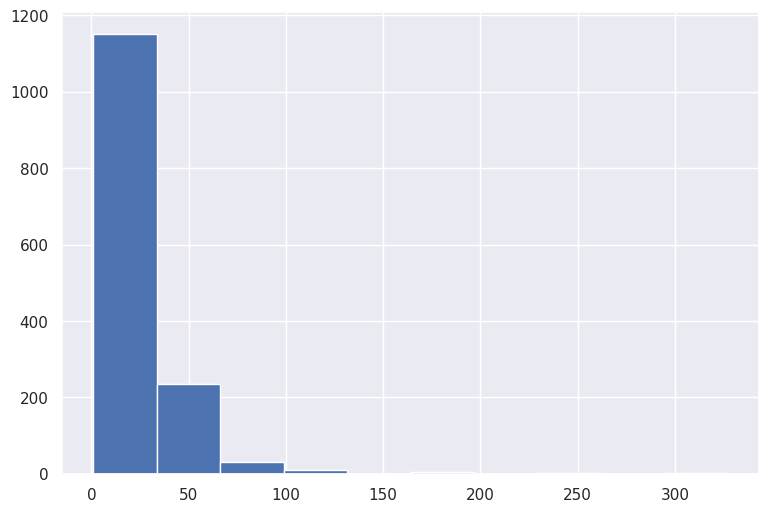

In [86]:
users_data[users_data.finished_course].day.hist()

In [87]:
min_date_time = event_data.groupby('user_id').agg({'timestamp': 'min'})\
                .rename({'timestamp' : 'first_timestamp'}, axis=1)
event_data = event_data.merge(min_date_time, how='outer', on='user_id')

min_date_time

,first_timestamp
user_id,
1,1472827464
2,1514383364
3,1434358476
5,1466156809
7,1521634660
...,...
26790,1451484016
26793,1510225031
26794,1495287049


In [88]:
event_data.head()

,step_id,timestamp,action,user_id,date,day,first_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [89]:
users_data = users_data.merge(min_date_time, how='outer', on='user_id')
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day,finished_course,first_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [90]:
threshold = 3 * 24 * 60 * 60
event_data_train = event_data[event_data.timestamp <= (event_data.first_timestamp + threshold)]
event_data_train

,step_id,timestamp,action,user_id,date,day,first_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848
...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750


In [91]:
event_data_train.groupby('user_id').day.nunique().max()

4

In [92]:
subs_min_date_time = event_data.groupby('user_id').agg({'timestamp': 'min'})\
                .rename({'timestamp' : 'first_timestamp'}, axis=1)
submissions = submissions.merge(min_date_time, how='outer', on='user_id')

subs_min_date_time

,first_timestamp
user_id,
1,1472827464
2,1514383364
3,1434358476
5,1466156809
7,1521634660
...,...
26790,1451484016
26793,1510225031
26794,1495287049


In [93]:
submissions_train = submissions[submissions.timestamp <= submissions.first_timestamp + threshold]
submissions_train

,step_id,timestamp,submission_status,user_id,date,day,first_timestamp
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,1434345977
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,1434345977
...,...,...,...,...,...,...,...
509099,120745.0,1.501947e+09,wrong,2615,2017-08-05 15:29:19,2017-08-05,1501946660
509100,120745.0,1.503060e+09,correct,13177,2017-08-18 12:38:47,2017-08-18,1503055287
509101,120745.0,1.506348e+09,wrong,15253,2017-09-25 14:02:33,2017-09-25,1506347263
509102,120745.0,1.523035e+09,wrong,1424,2018-04-06 17:21:56,2018-04-06,1523035269


In [94]:
X = submissions_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [95]:
steps_tried = submissions_train.groupby('user_id').step_id.nunique()\
              .to_frame().reset_index().rename({'step_id' : 'steps_tried'})
X = X.merge(steps_tried, how='outer', on='user_id')
X

,user_id,day,step_id
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [96]:
subs_train_pt = submissions_train.pivot_table(index='user_id', columns='submission_status',
                              values='step_id', aggfunc='count',
                              fill_value=0).reset_index()
subs_train_pt

submission_status,user_id,correct,wrong
0,2,2,0
1,3,4,4
2,8,9,21
3,14,0,1
4,16,23,27
...,...,...,...
8908,26787,3,0
8909,26790,1,0
8910,26794,31,9
8911,26797,2,0


In [97]:
X = X.merge(subs_train_pt, how='outer', on='user_id')
X

,user_id,day,step_id,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27
...,...,...,...,...,...
8908,26787,1,3,3,0
8909,26790,1,1,1,0
8910,26794,3,27,31,9
8911,26797,1,2,2,0


In [98]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)
X.head()

,user_id,day,step_id,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


# Поиск id Анатолия Карпова

Поиск пользователей, наиболее быстро прошедших курс

In [99]:
certified_users = users_actions_pt[(users_actions_pt.passed == 198)].user_id
certified_users.values

array([   22,    30,    39,    80,   149,   214,   275,   296,   528,
         560,   676,   702,   713,   752,   822,   827,   902,   911,
         927,   956,  1058,  1074,  1076,  1107,  1139,  1151,  1173,
        1188,  1215,  1218,  1468,  1604,  1614,  1702,  1715,  1742,
        1846,  1886,  1913,  2054,  2056,  2078,  2098,  2248,  2355,
        2367,  2393,  2444,  2480,  2496,  2505,  2547,  2566,  2567,
        2700,  2801,  2818,  2832,  2836,  3087,  3148,  3204,  3285,
        3330,  3433,  3516,  3600,  3607,  3643,  3721,  3784,  3834,
        3931,  3990,  4090,  4163,  4172,  4189,  4239,  4320,  4465,
        4546,  4578,  4585,  4610,  4774,  4795,  4824,  4867,  4903,
        4965,  5062,  5247,  5373,  5552,  5560,  5563,  5573,  5596,
        5653,  5801,  5830,  5861,  5929,  5950,  5952,  6020,  6074,
        6378,  6431,  6446,  6447,  6571,  6626,  6742,  6762,  6864,
        6881,  7020,  7081,  7152,  7180,  7294,  7295,  7608,  7682,
        7769,  7858,

In [100]:
certified_data = event_data[event_data.user_id.isin(certified_users.values)]
certified_data.head()

,step_id,timestamp,action,user_id,date,day,first_timestamp
11927,32815,1434344946,discovered,11670,2015-06-15 05:09:06,2015-06-15,1434344946
11928,32815,1434344946,passed,11670,2015-06-15 05:09:06,2015-06-15,1434344946
11929,32815,1434344946,viewed,11670,2015-06-15 05:09:06,2015-06-15,1434344946
11930,32811,1434344952,discovered,11670,2015-06-15 05:09:12,2015-06-15,1434344946
11931,32811,1434344952,viewed,11670,2015-06-15 05:09:12,2015-06-15,1434344946


In [101]:
certified_times = certified_data[['user_id', 'day', 'timestamp']] \
  .drop_duplicates(subset=['user_id', 'day']) \
  .groupby('user_id')['timestamp'].apply(list) \
  .apply(np.diff).values
certified_times = pd.Series(np.concatenate(certified_times, axis=0)) / (60)
certified_times.sort_values().head(10)

8829    13.233333
551     17.716667
1171    21.800000
2881    26.700000
8838    28.983333
7324    30.283333
332     31.850000
5879    43.750000
7025    46.433333
1739    48.333333
dtype: float64

Поиск id Анатолия Карпова

In [102]:
submissions[submissions['submission_status'] == 'correct'] \
  .groupby('user_id') \
  .agg({'submission_status': 'count'}) \
  .rename(columns= {'submission_status' : 'solved_tasks'}).sort_values('solved_tasks', ascending=False)

,solved_tasks
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135
...,...
6191,1
6184,1
6166,1


# Задание  
Для каждого пользователя найдите такой шаг, который он не смог решить, и после этого не пытался решать другие шаги. Затем найдите id шага,  который стал финальной точкой практического обучения на курсе для максимального числа пользователей.

# Model